In [1]:
import seaborn as sns

In [28]:
tips = sns.load_dataset('tips')

In [29]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [30]:
# numpy의 size와 이름이 겹치니까 바꿔줌.
# 관례상 뒤에 _를 붙여줌.

tips.rename({'size':'size_'}, axis=1, inplace=True)
tips.head()

,total_bill,tip,sex,smoker,day,time,size_
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
# category의 value_counts는 column의 value 종류에 그 갯수를 정리해준다.

tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [32]:
# .plot하면 항상 그래프를 그릴 수 있다.

tips.sex.value_counts().plot

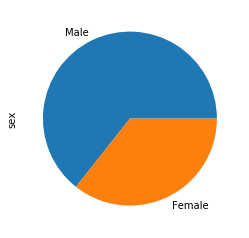

In [33]:
# .plot. 하고 tab 눌러보면 그릴 수 있는 그래프가 자동완성 뜬다.
# 안 뜨면 그래프를 하나의 변수로 할당시킨 다음에 .plot. 하고 tab하면 나올거임 (판다스 버그임.)

tips.sex.value_counts().plot.pie()

In [34]:
# unique는 column에 있는 값들의 종류를 보여줌.
# category, object dtype 둘 다 쓸 수 있다.

tips.sex.unique()

[Female, Male]
Categories (2, object): [Female, Male]

In [35]:
# nunique는 category dtype인 column에서 category 갯수를 보여준다.

tips.sex.nunique()

2

In [36]:
# 문자열 dtype의 추가 기능을 .str로 쓰듯, category dtype의 추가기능은 .cat에 들어있다.
# cat.codes는 label encoding해준다.

tips.sex.cat.codes

0      1
1      0
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      0
10     0
11     1
12     0
13     0
14     1
15     0
16     1
17     0
18     1
19     0
20     0
21     1
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     1
      ..
214    1
215    1
216    0
217    0
218    0
219    1
220    0
221    1
222    0
223    1
224    0
225    1
226    1
227    0
228    0
229    1
230    0
231    0
232    0
233    0
234    0
235    0
236    0
237    0
238    1
239    0
240    1
241    0
242    0
243    1
Length: 244, dtype: int8

In [37]:
tips.groupby(['size_', 'sex']).mean()

total_bill       tip
size_ sex                         
1     Male      8.580000  1.920000
      Female    6.796667  1.276667
2     Male     17.104082  2.614184
      Female   15.339483  2.528448
3     Male     24.287083  3.476667
      Female   21.547143  3.250000
4     Male     28.078214  4.172143
      Female   30.278889  4.021111
5     Male     30.122500  3.750000
      Female   29.850000  5.140000
6     Male     41.235000  5.850000
      Female   28.425000  4.600000

In [38]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size_         244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [39]:
# dtype 바꿔보기

tips['size_'] = tips['size_'].astype('int64')

In [40]:
# label encoding하기

tips['smoker'] = tips['smoker'].cat.codes

In [41]:
tips['day'] = tips['day'].cat.codes

In [42]:
tips['time'] = tips['time'].cat.codes

In [43]:
# dtype이 바뀐 것을 확인.

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null int8
time          244 non-null int8
size_         244 non-null int64
somoker       244 non-null int8
dtypes: category(2), float64(2), int64(1), int8(3)
memory usage: 7.2 KB


In [44]:
# day, time, smoker 가 원래 object, category라서 안보였었는데, 숫자로 바껴서 groupby할때 보인다.

tips.groupby(['size_', 'sex']).mean()

total_bill       tip       day      time   somoker
size_ sex                                                       
1     Male      8.580000  1.920000  1.000000  0.000000  0.000000
      Female    6.796667  1.276667  1.333333  0.666667  0.666667
2     Male     17.104082  2.614184  1.755102  0.734694  0.581633
      Female   15.339483  2.528448  1.155172  0.551724  0.568966
3     Male     24.287083  3.476667  2.208333  0.916667  0.708333
      Female   21.547143  3.250000  2.071429  0.785714  0.642857
4     Male     28.078214  4.172143  2.321429  0.928571  0.678571
      Female   30.278889  4.021111  1.777778  0.666667  0.777778
5     Male     30.122500  3.750000  2.000000  0.750000  0.500000
      Female   29.850000  5.140000  3.000000  1.000000  1.000000
6     Male     41.235000  5.850000  1.500000  0.500000  1.000000
      Female   28.425000  4.600000  0.000000  0.000000  1.000000

---

In [45]:
mpg = sns.load_dataset('mpg')

In [46]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [47]:
# horsepower에 null 값이 있다는 것을 간파해야한다.

mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [48]:
!pip install missingno

In [49]:
# 선생님의 노하우
# missingno package를 하면 missing value 찾기가 더 편하다.

import missingno as mino

In [55]:
# 쓸 수 있는 게 많지 않다 : 착하다.

dir(mino)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'geoplot',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

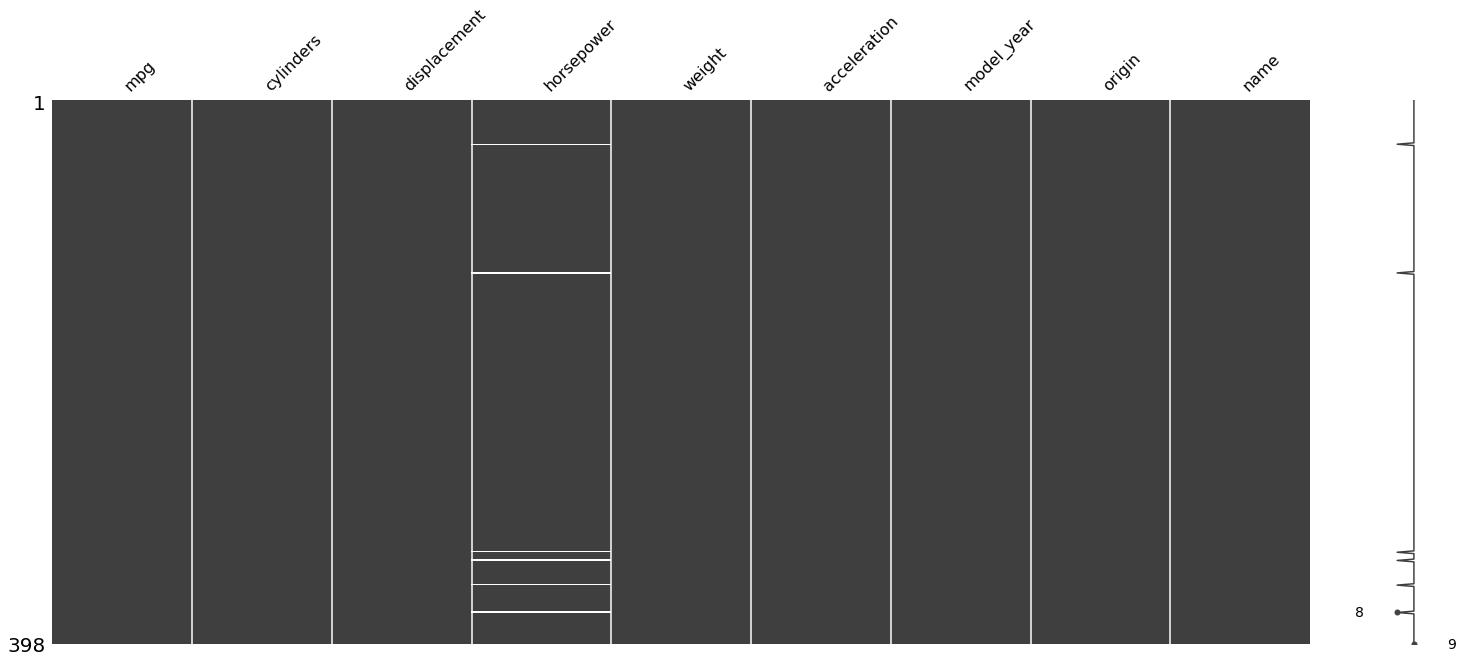

In [50]:
# 흰 줄 있는 부분이 missing value 있는 것임

mino.matrix(mpg)

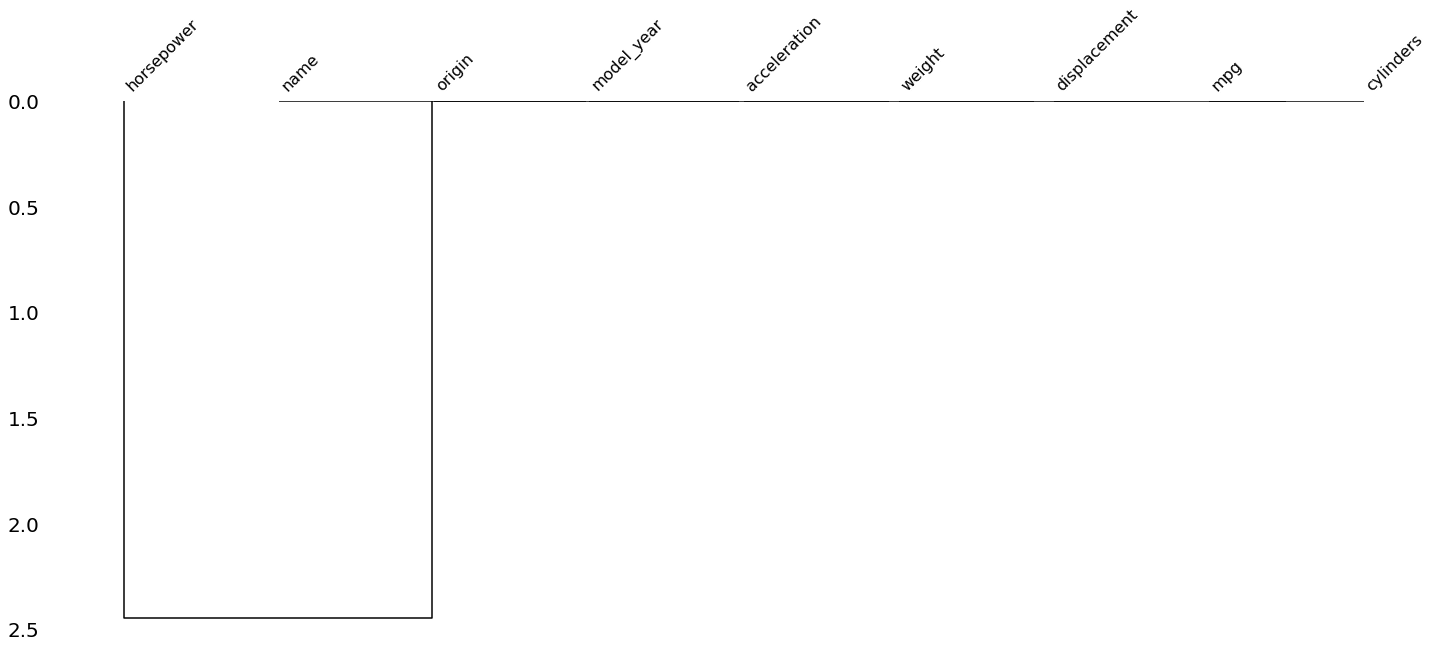

In [52]:
# dendrogram.... 뭔지 알죠? (몰라요 쌤...ㅜㅜ)
# 종익이 말로는 k-means에서 clustering 하는 거를 거꾸로 그린거라고 함.

mino.dendrogram(mpg)

In [54]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


C:\Users\JINHYO\Anaconda3\lib\site-packages\matplotlib\artist.py:913: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  return func(v)
C:\Users\JINHYO\Anaconda3\lib\site-packages\matplotlib\artist.py:913: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  return func(v)


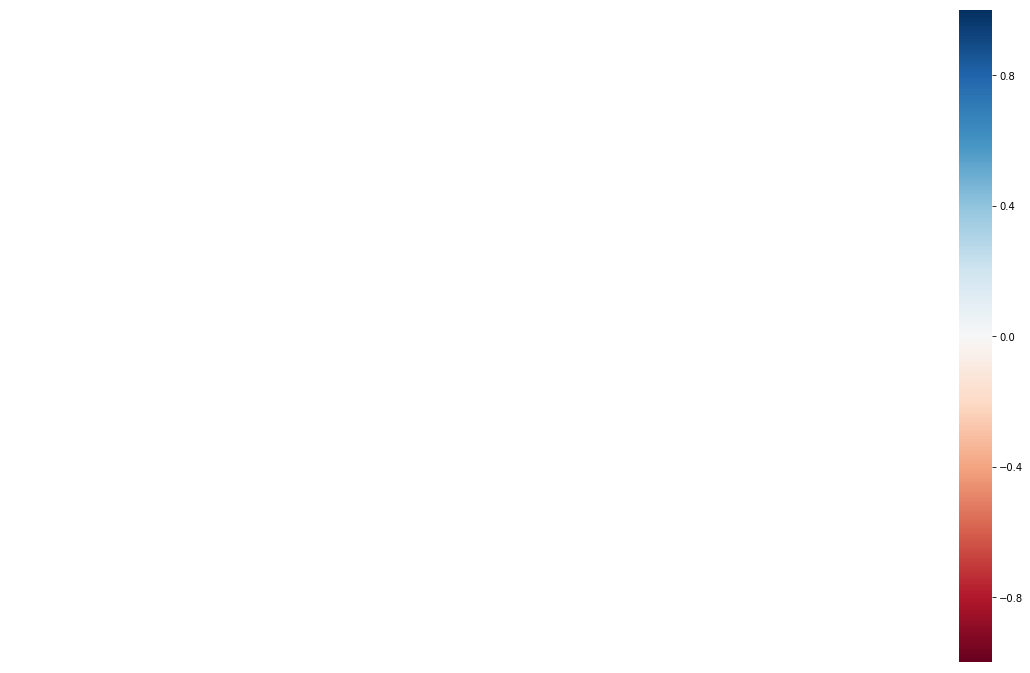

In [53]:
# heatmap 선생님이 참 좋아하는데~~~ 데이터가 너무 많으면 안보이는 경우가 종종 있음 ㅜㅜ
# 얘는 컬러이고 참 이쁜데~~

mino.heatmap(mpg.corr())

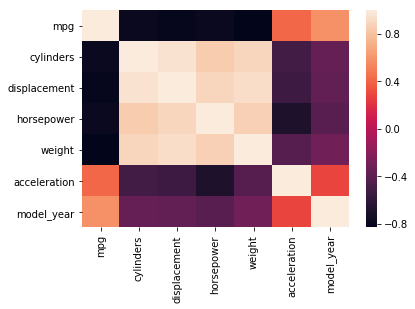

In [70]:
# 이렇게 생겼어요 heatmap.

sns.heatmap(mpg.corr())

In [59]:
# mino를 안 쓰고 missing value를 찾는 방법
# True False만 있으면 마스킹 기법 쓸 수 있다. (numpy에서 나왔으니까.)

mpg.horsepower.isna()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
368    False
369    False
370    False
371    False
372    False
373    False
374     True
375    False
376    False
377    False
378    False
379    False
380    False
381    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [66]:
# 마스킹 기법.

mpg.horsepower[mpg.horsepower.isna()]

32    NaN
126   NaN
330   NaN
336   NaN
354   NaN
374   NaN
Name: horsepower, dtype: float64

In [67]:
# 마스킹 기법.

mpg[mpg.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [60]:
# True는 1, False는 0 이니까 sum 하면 missing 값을 찾을 수 있다.

mpg.horsepower.isna().sum()

6

In [62]:
# all은 value 중에 하나라도 false가 있으면 false를 반환한다.

mpg.horsepower.isna().all()

False

In [64]:
import pandas as pd

In [65]:
# isna와 isnull은 똑같다.
# 한글자라도 짧은 isna를 쓰자.

# 여태까지 pandas를 import 안하고도 isna를 쓸 수 있었던 이유?
#  =>  

pd.isna is pd.isnull

True

In [69]:
# missing value를 그냥 날려버리는 방법.
# 친절하게 dropna라는 메서드를 만들어 놓으심.
# inplace 안하면 자기자신 바꾸지 않음.

mpg.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [68]:
# 374개 데이터 중에 na값  6개 버릴까?
# 당신에게 374만원이 있다면 6만원 버릴 수 있습니까?
# big data 분석할 때는 버릴 수도 있는데, 374개 데이터는 빅데이터가 아님... 데이터 하나라도 더 있어야 성능이 잘 나옴.
# 그래서 여기서는 포기할 수 없다 6개 데이터!!

In [76]:
# na 값을 채우는 함수.
# 내가 정한 특정값으로 na를 채울 수 있다.
# 가짜 데이터 만드는 방법과 같다.  =>  특정 데이터를 예측해서 채워넣을 수도 있다.

# 대충 일단 3이라고 해보자.

mpg.horsepower.fillna(3, inplace=True)

In [77]:
# 채워졌군!!

mpg.loc[32]

mpg                     25
cylinders                4
displacement            98
horsepower               3
weight                2046
acceleration            19
model_year              71
origin                 usa
name            ford pinto
Name: 32, dtype: object

C:\Users\JINHYO\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2885: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0
  ax.set_ylim([dvw, 0])


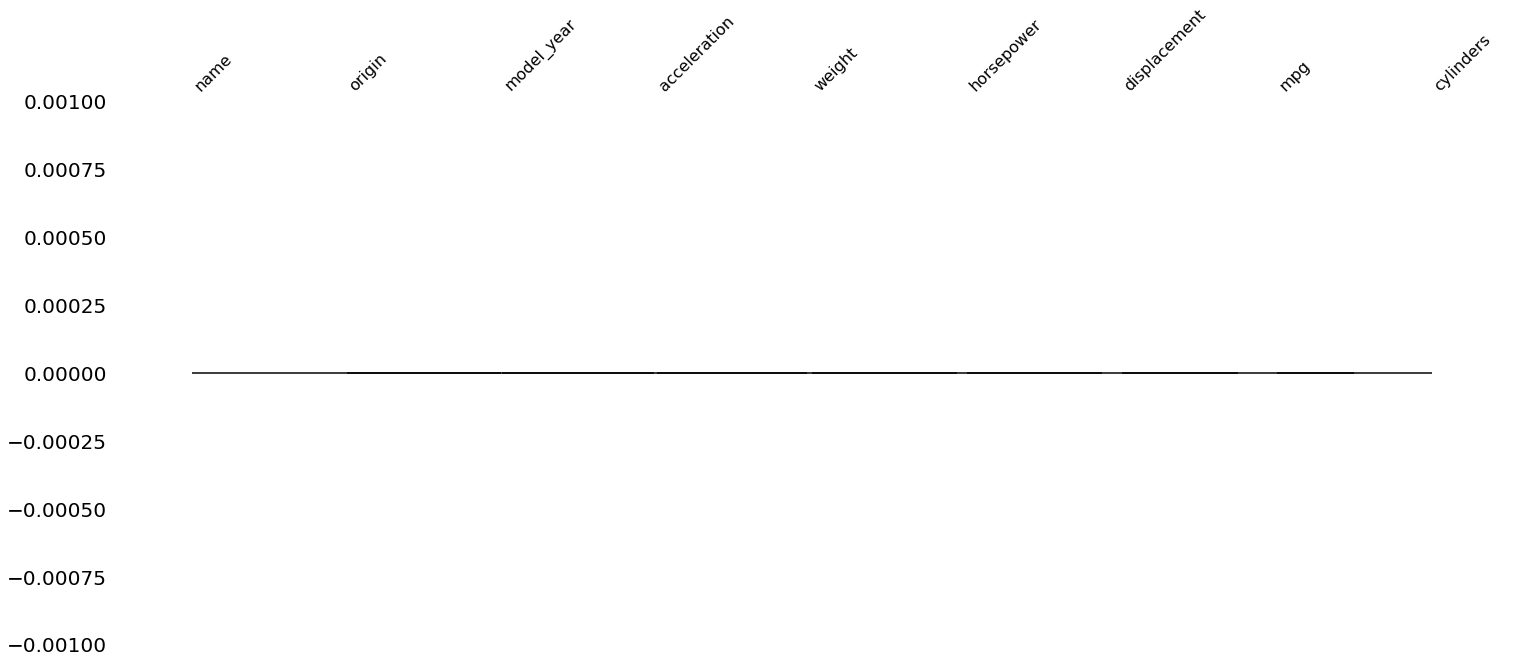

In [80]:
# missing value를 처리하고 다시 dendromgram을 그려보자.

mino.dendrogram(mpg)

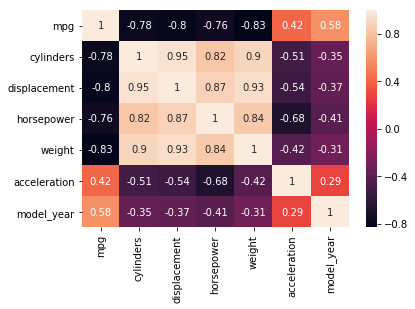

In [86]:
# heatmap도 다시 그려보자.

sns.heatmap(mpg.corr(),annot=True)

In [87]:
# T는 transpose
# 열과 행을 바꿔준다.
# 그래프를 그릴때 index가 x축이 된다. 
# 이렇게 하면 cloumns가 x축이 된다.

mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,102.939698,40.155195,3.0,75.000,92.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


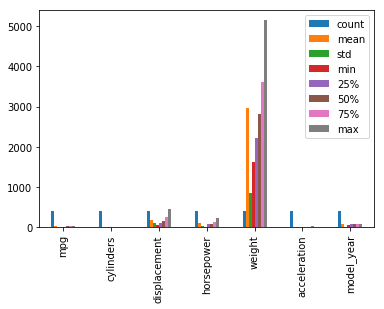

In [90]:
mpg.describe().T.plot.bar()

In [91]:
# column 이름들을 index list로 만들어 준다.

mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [92]:
# list니까 슬라이싱도 할 수 있다.

mpg.columns[:2]

Index(['mpg', 'cylinders'], dtype='object')

In [94]:
# fancy indexing에 쓸 수 있다!!!

mpg[mpg.columns[:2]].head()

,mpg,cylinders
0,18.0,8
1,15.0,8
2,18.0,8
3,16.0,8
4,17.0,8


In [100]:
# filter라는 애로 내가 원하는 애만 넣거나 뺄 수 있다.
# 정규식으로 걸러내는 방법.

# weight 컬럼만 빼기.
# 정규식의 ^를 이용해서 걸러서 빼는 기법이다.

mpg.filter(regex="[^weight]", axis=1).head()

,mpg,cylinders,displacement,horsepower,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,10.5,70,usa,ford torino


In [102]:
# ^가 없으며 해당하는 column만 가져옴.

mpg.filter(regex='weight').head()

,weight
0,3504
1,3693
2,3436
3,3433
4,3449


In [101]:
mpg.filter(regex="^[^w]").head()

,mpg,cylinders,displacement,horsepower,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,10.5,70,usa,ford torino


In [95]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [107]:
mpg.filter(regex='[^weight]').describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,102.939698,40.155195,3.0,75.000,92.0,125.000,230.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


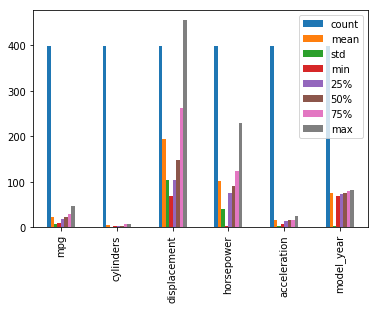

In [108]:
mpg.filter(regex='[^weight]').describe().T.plot.bar()

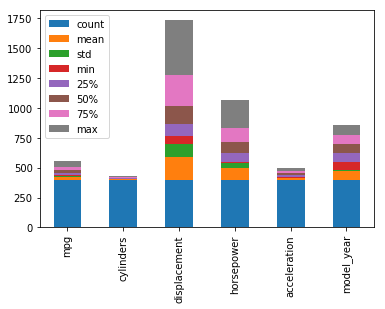

In [109]:
# stacked option을 주면 쌓아서 보여준다.

mpg.filter(regex='[^weight]').describe().T.plot.bar(stacked=True)

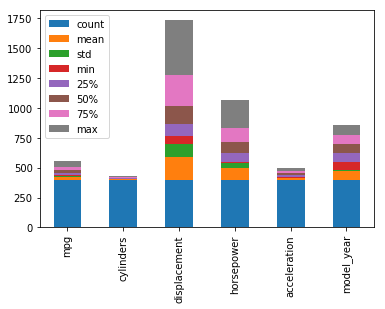

In [110]:
# 끝에 세미콜론(;)을 붙이면 out이라는 줄이 안생긴다.
# print처럼 생김.

mpg.filter(regex='[^weight]').describe().T.plot.bar(stacked=True);

In [106]:
# column을 뽑는 또 다른 방법.
# 알아두세용.

mpg.select_dtypes("object")

,origin,name
0,usa,chevrolet chevelle malibu
1,usa,buick skylark 320
2,usa,plymouth satellite
3,usa,amc rebel sst
4,usa,ford torino
5,usa,ford galaxie 500
6,usa,chevrolet impala
7,usa,plymouth fury iii
8,usa,pontiac catalina
9,usa,amc ambassador dpl


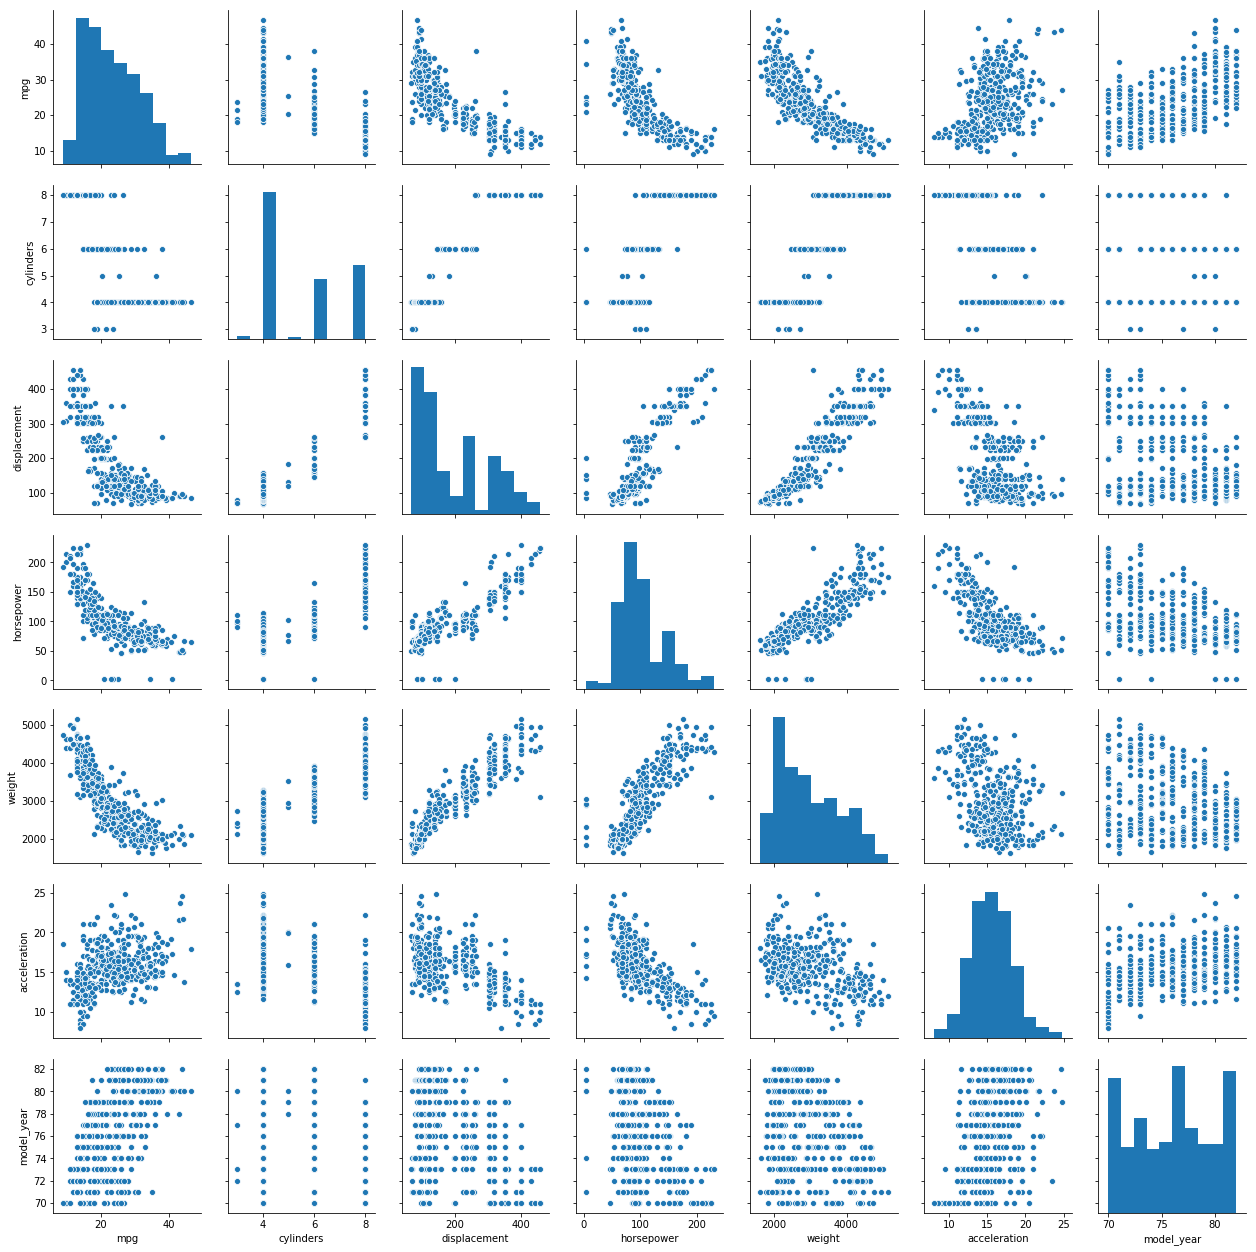

In [111]:
# classification data는 컬러로 나타낼수도 있는데.
# regression data는 컬러로 나타낼수 없다. 안 이뻐 흥.

# parplot에서 한줄로 쭉 나열된 모양이 나오면 category dtype이다.

sns.pairplot(mpg)

In [112]:
# 상관계수

# method = 상관계수 구하는 방법 (여러개 있으용)  
#     * pearson : standard correlation coefficient
#     * kendall : Kendall Tau correlation coefficient
#     * spearman : Spearman rank correlation
#     * callable: callable with input two 1d ndarrays

mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.755776,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.823252,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.873713,0.932824,-0.543684,-0.370164
horsepower,-0.755776,0.823252,0.873713,1.000000,0.839749,-0.675144,-0.412152
weight,-0.831741,0.896017,0.932824,0.839749,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.675144,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.412152,-0.306564,0.288137,1.000000


In [113]:
# 공분산
# 상관계수와 차이점: scale

mpg.cov()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,61.089611,-10.308911,-655.402318,-237.202142,-5505.211745,9.058930,16.741163
cylinders,-10.308911,2.893415,168.623214,56.231523,1290.695575,-2.370842,-2.193499
displacement,-655.402318,168.623214,10872.199152,3658.213403,82368.423240,-156.332976,-142.717137
horsepower,-237.202142,56.231523,3658.213403,1612.439680,28555.758667,-74.762382,-61.195866
weight,-5505.211745,1290.695575,82368.423240,28555.758667,717140.990526,-974.899011,-959.946344
acceleration,9.058930,-2.370842,-156.332976,-74.762382,-974.899011,7.604848,2.938105
model_year,16.741163,-2.193499,-142.717137,-61.195866,-959.946344,2.938105,13.672443


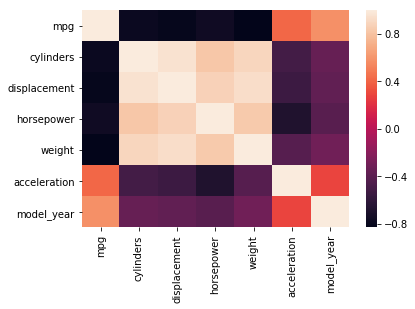

In [114]:
sns.heatmap(mpg.corr())

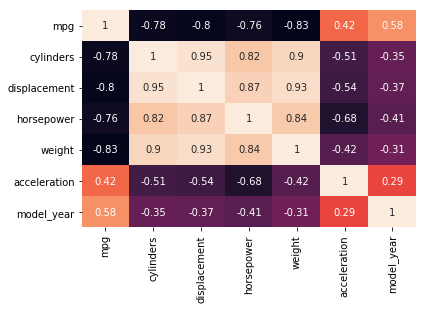

In [116]:
# annot은 숫자를 그래프 위에 띄워준다.
# cbar는 오른쪽에 붙은 컬러 bar 이다. (선생님은 안좋아해서 지운다하심.ㅋ)

sns.heatmap(mpg.corr(), annot=True, cbar=False);

In [117]:
# 다중 공선성 (Multicollinearity)
# 모르면 오늘 공부하세요~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

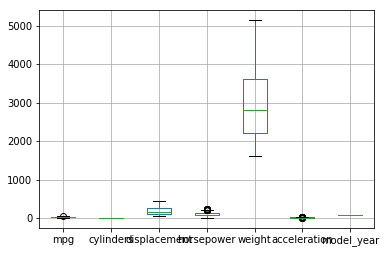

In [118]:
# weigt가 너무 값의 범위가 커서 다른 녀석들이 잘 안보인다.
# 이때 필요한 것이 scaling이다.  =>  Normalization
# scaling은 나중에 공부할거다.

mpg.boxplot()

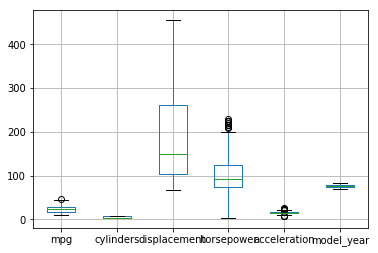

In [119]:
# weight 컬럼을 빼고 보면,,,
# 저기 boxplot 바깥에 까맣게 찍힌 점같은 애들이 outlier이다.
# 뭐하는 녀석인지 모른다. 함부로 없애면 위험하다.

mpg.filter(regex='[^weight]').boxplot()

In [120]:
# PYod: outlier detection package
# 나중에 시간되면 수업할게요.

In [123]:
# 분포에 관련한 범위를 내가 지정할 수도 있다.
# outlier 분석할때 이런 방법을 사용하기도 한다.
# 이 예시는 안좋은 예시인데 그냥 방법만 보여줌.

mpg.describe([.005, .5, .75])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.939698,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,40.155195,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,3.000000,1613.000000,8.000000,70.000000
0.5%,10.000000,3.000000,70.000000,3.000000,1753.410000,8.500000,70.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


----

# tidy data

In [127]:
# 학습자료로 올려준 파일임.
# 읽어보니 이상하게 생겼다.
# 원본을 열어보고 어떻게 생겨먹었나 봐야함.

pd.read_csv('tidy-data-master/data/pew.txt').head()

,"religion ""<$10k"" ""$10-20k"" ""$20-30k"" ""$30-40k"" ""$40-50k"" ""$50-75k"" ""$75-100k"" ""$100-150k"" "">150k"" ""Don't know/refused"""
0,Agnostic\t27\t34\t60\t81\t76\t137\t122\t109\t8...
1,Atheist\t12\t27\t37\t52\t35\t70\t73\t59\t74\t76
2,Buddhist\t27\t21\t30\t34\t33\t58\t62\t39\t53\t54
3,Catholic\t418\t617\t732\t670\t638\t1116\t949\t...
4,Don’t know/refused\t15\t14\t15\t11\t10\t35\t21...


In [131]:
# delimeter = '\t'해도 된다.

# 근데 이런 데이터 모양은 사람이 보기에는 이해가 잘 되지만, CS분석에서는 최악이다.
# religion을 제외하고는 다 돈의 범위일 뿐이다. 즉, 같은 컬럼으로 묶을 수 있는 것이다.

# 분석할때는 가로로 늘어지는 데이터 포맷을 wide 포맷이라고 한다.
# wide 포맷은 지양한다.  ->  데이터가 늘어나면 column이 늘어나기 때문이다.

# 데이터가 추가되면 세로로 늘어지는 데이터 포맷을 long 포맷이라고 한다.
# long 포맷은 지향한다. ->  tidy data에 가깝다.

pd.read_csv('tidy-data-master/data/pew.txt', sep="\t").head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [132]:
pew = pd.read_csv('tidy-data-master/data/pew.txt', sep="\t")

In [133]:
# wide 포맷을 long 포맷으로 바꿔주는 메서드
# 고정시킬 값만 넣어준다.

pew.melt(['religion'])

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah's Witness,<$10k,20
9,Jewish,<$10k,19


In [134]:
# 이런식으로 column 이름을 정해줄 수도 있따.

pew.melt(['religion'], var_name="값의 범위", value_name='갯수')

,religion,값의 범위,갯수
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah's Witness,<$10k,20
9,Jewish,<$10k,19


In [135]:
# melt하지 않은 상태로 보면, describe가 의미없는 분석이다.

pew.describe()

,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,107.222222,154.500000,186.500000,183.444444,171.388889,288.055556,221.666667,177.611111,144.888889,340.055556
std,168.931784,255.172433,309.891869,291.470354,271.144446,458.442436,345.078849,275.679724,205.224952,530.523878
min,1.000000,2.000000,3.000000,4.000000,2.000000,7.000000,3.000000,4.000000,4.000000,8.000000
25%,12.250000,14.750000,17.000000,15.750000,15.000000,34.250000,25.250000,22.500000,23.750000,41.250000
50%,20.000000,27.000000,33.500000,40.000000,34.000000,66.500000,65.500000,48.500000,53.500000,74.500000
75%,170.000000,193.000000,192.000000,198.750000,166.750000,201.500000,128.750000,103.500000,134.250000,294.750000
max,575.000000,869.000000,1064.000000,982.000000,881.000000,1486.000000,949.000000,792.000000,634.000000,1529.000000


In [136]:
# 깔-끔;

pew.melt(['religion']).describe()

,value
count,180.000000
mean,197.533333
std,326.548693
min,1.000000
25%,18.000000
50%,46.000000
75%,218.500000
max,1529.000000


In [140]:
# 2번째 예시

weather = pd.read_csv('tidy-data-master/data/weather.txt', delimiter="\t")

In [142]:
# 날짜는 순차적으로 가는데 

weather.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX000017004,2010,1,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.0,NaN
1,MX000017004,2010,1,TMIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,NaN
2,MX000017004,2010,2,TMAX,NaN,273.0,241.0,NaN,NaN,NaN,...,NaN,299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX000017004,2010,2,TMIN,NaN,144.0,144.0,NaN,NaN,NaN,...,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX000017004,2010,3,TMAX,NaN,NaN,NaN,NaN,321.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
# melt로 정리해보자.

weather.melt(weather.columns[:4])

,id,year,month,element,variable,value
0,MX000017004,2010,1,TMAX,d1,NaN
1,MX000017004,2010,1,TMIN,d1,NaN
2,MX000017004,2010,2,TMAX,d1,NaN
3,MX000017004,2010,2,TMIN,d1,NaN
4,MX000017004,2010,3,TMAX,d1,NaN
5,MX000017004,2010,3,TMIN,d1,NaN
6,MX000017004,2010,4,TMAX,d1,NaN
7,MX000017004,2010,4,TMIN,d1,NaN
8,MX000017004,2010,5,TMAX,d1,NaN
9,MX000017004,2010,5,TMIN,d1,NaN


In [151]:
# Nan은 사실상 의미없는 value이다.
# melt하기 전부터 의미없는 애들이었으므로....
# 날리면 깔끔.

weather = weather.melt(weather.columns[:4], var_name='day').dropna()
weather

,id,year,month,element,day,value
20,MX000017004,2010,12,TMAX,d1,299.0
21,MX000017004,2010,12,TMIN,d1,138.0
24,MX000017004,2010,2,TMAX,d2,273.0
25,MX000017004,2010,2,TMIN,d2,144.0
40,MX000017004,2010,11,TMAX,d2,313.0
41,MX000017004,2010,11,TMIN,d2,163.0
46,MX000017004,2010,2,TMAX,d3,241.0
47,MX000017004,2010,2,TMIN,d3,144.0
56,MX000017004,2010,7,TMAX,d3,286.0
57,MX000017004,2010,7,TMIN,d3,175.0


In [159]:
weather.id.nunique()

1

In [160]:
weather.describe()

,year,month,value
count,66.0,66.000000,66.000000
mean,2010.0,7.212121,219.212121
std,0.0,3.417220,77.294744
min,2010.0,1.000000,79.000000
25%,2010.0,4.000000,150.000000
50%,2010.0,8.000000,211.500000
75%,2010.0,10.000000,289.250000
max,2010.0,12.000000,363.000000


In [161]:
# id와 year는 모든 행이 같은 값임.
# 의미 없으니까 버리자.

weather.drop(columns=['id', 'year'], inplace=True )

In [162]:
weather.reset_index(drop=True, inplace=True)

In [163]:
weather.day = weather.day.str.replace("d", '')

In [165]:
weather.day = weather.day.astype("int64")

In [166]:
weather.head()

,month,element,day,value
0,12,TMAX,1,299.0
1,12,TMIN,1,138.0
2,2,TMAX,2,273.0
3,2,TMIN,2,144.0
4,11,TMAX,2,313.0


In [167]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
month      66 non-null int64
element    66 non-null object
day        66 non-null int64
value      66 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.1+ KB


In [171]:
weather = pd.read_csv("tidy-data-master/data/weather.txt", delimiter='\t')

In [172]:
weather.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX000017004,2010,1,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.0,NaN
1,MX000017004,2010,1,TMIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,NaN
2,MX000017004,2010,2,TMAX,NaN,273.0,241.0,NaN,NaN,NaN,...,NaN,299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX000017004,2010,2,TMIN,NaN,144.0,144.0,NaN,NaN,NaN,...,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX000017004,2010,3,TMAX,NaN,NaN,NaN,NaN,321.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
# wide_to_long으로 이렇게 만들 수도 있다.

pd.wide_to_long(weather, 'd', ['id', 'year', 'month', 'element'], '').dropna()

d
id          year month element          
MX000017004 2010 1     TMAX    30  278.0
                       TMIN    30  145.0
                 2     TMAX    2   273.0
                               3   241.0
                               11  297.0
                               23  299.0
                       TMIN    2   144.0
                               3   144.0
                               11  134.0
                               23  107.0
                 3     TMAX    5   321.0
                               10  345.0
                               16  311.0
                       TMIN    5   142.0
                               10  168.0
                               16  176.0
                 4     TMAX    27  363.0
                       TMIN    27  167.0
                 5     TMAX    27  332.0
                       TMIN    27  182.0
                 6     TMAX    17  280.0
                               29  301.0
                       TMIN    17  175.0
                               29  180.0
                 7     TMAX    3   286.0
                               14  299.0
                       TMIN    3   175.0
                               14  165.0
                 8     TMAX    5   296.0
                               8   290.0
...                                  ...
                       TMIN    8   173.0
                               13  165.0
                               23  150.0
                               25  156.0
                               29  153.0
                               31  154.0
                 10    TMAX    5   270.0
                               7   281.0
                               14  295.0
                               15  287.0
                               28  312.0
                       TMIN    5   140.0
                               7   129.0
                               14  130.0
                               15  105.0
                               28  150.0
                 11    TMAX    2   313.0
                               4   272.0
                               5   263.0
                               26  281.0
                               27  277.0
                       TMIN    2   163.0
                               4   120.0
                               5    79.0
                               26  121.0
                               27  142.0
                 12    TMAX    1   299.0
                               6   278.0
                       TMIN    1   138.0
                               6   105.0

[66 rows x 1 columns]

In [124]:
billboard = pd.read_csv('tidy-data-master/data/billboard.csv')

In [125]:
billboard

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.week         210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week         182 no